### CE88: Data Science for Smart Cities - 10/16/17

# Labs 1-2 and Homework summary

This notebook is a summary of what we have completed in the course so far. It covers the bay bridge traffic count data (Lab 1 Data.ipnb), the census data, and Linear Algebra for lab 2 and analysis for homework questions.

In this class, we use the datascience library often, to find documentation of some of the functions and methods available in this library, visit http://data8.org/datascience/

In [8]:
from datascience import *
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plots
import matplotlib.dates as mdates
import pandas as pd

# Bay Bridge traffic count 


We are given the traffic flow of 5 lanes on the Bay Bridge for one week.

In [9]:
data = Table.read_table('pems_output.csv')
data

Hour,Lane 1 Flow (Veh/Hour),Lane 2 Flow (Veh/Hour),Lane 3 Flow (Veh/Hour),Lane 4 Flow (Veh/Hour),Lane 5 Flow (Veh/Hour),Flow (Veh/Hour),# Lane Points,% Observed
1/14/2016 0:00,34,347,372,291,119,1163,60,100
1/14/2016 1:00,20,199,295,230,74,818,60,100
1/14/2016 2:00,17,248,342,267,114,988,60,100
1/14/2016 3:00,158,427,433,347,164,1529,60,100
1/14/2016 4:00,883,1033,912,737,543,4108,60,100
1/14/2016 5:00,2037,1944,1734,1617,1594,8926,60,100
1/14/2016 6:00,1838,1844,1709,1715,1626,8732,60,100
1/14/2016 7:00,1790,1883,1760,1720,1627,8780,60,100
1/14/2016 8:00,1739,1820,1686,1621,1617,8483,60,100
1/14/2016 9:00,1709,1705,1681,1591,1631,8317,60,100


First we learned how to graph the data using line graphs and scatter plots

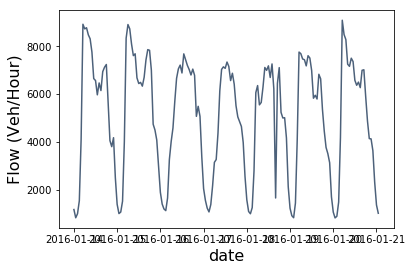

In [10]:
#First we graphed the total flow in all 5 lanes using line plots   
data['date'] = pd.to_datetime(data['Hour']) #Use the Pandas' to_datetime method to convert the hours given to military time [0:00-23:59]
Lane_data = data.select(['date','Flow (Veh/Hour)']) #We are only interested total flow, which is in the 'Flow (Veh/Hour)' column
Lane_data.plot('date') #.plot method draws the line graph of the data


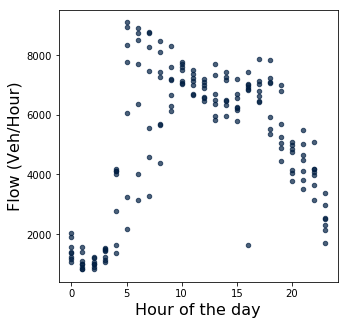

In [11]:
#We also learned how to graph the data using scatter plot 
data['Hour of the day'] = pd.to_datetime(data['Hour']).hour #Use the Pandas .hour attribute to make a column to indicate what hour of the day the row came from[0-24]   
data.select(['Hour of the day','Flow (Veh/Hour)']).scatter('Hour of the day')

In the homework, we applied the datascience library to manipulate this data set to extract information and solve problems. 

In problem 5 of the homework, we were asked to study the lane with the most flow between 8-11pm. To accomplish this, you could filter the data to only include data from that time period.

In [12]:
#Only include data from 8-11 pm
filtered_data = data.where((data['Hour of the day'] >= 20) & (data['Hour of the day'] <= 23)) 
#Filter to only see lane flow
filtered_data = filtered_data.select(['Lane 1 Flow (Veh/Hour)', 'Lane 2 Flow (Veh/Hour)', 'Lane 3 Flow (Veh/Hour)', 'Lane 4 Flow (Veh/Hour)','Lane 5 Flow (Veh/Hour)'])    
                    

In [13]:
#To find the total flow of each lane, use numpy's sum function to add up the values in each column
np.sum(filtered_data)

/Users/Mohammed/anaconda/lib/python3.6/site-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


Lane 1 Flow (Veh/Hour),Lane 2 Flow (Veh/Hour),Lane 3 Flow (Veh/Hour),Lane 4 Flow (Veh/Hour),Lane 5 Flow (Veh/Hour)
21698,28251,25420,21102,11924


Comparing these values gives the solution that Lane 2 had the most flow. The same process can be used to find the lane with the least flow for any time interval of the day. 

# TAZ 

For homework 1 we worked with the data set of the traffic analysis zone (TAZ) for the Bay Area

In [14]:
travel_data = Table.read_table("sf_oak_traveltimes_bymode.csv") #Write TAZ data into table

You were asked to find the worst mode of travel (most travel time) from origin 10 to destination 1019 

In [15]:
travel_data.where('origin',10).where('destination', 1019)

origin,destination,drive alone,shared ride (2 people),shared ride (3 people),walk,bike,walk-transit-walk,drive-transit-walk,walk-transit-drive
10,1019,23.64,23.64,23.64,-999,-999,51.05,48.76,44.04


You were also asked to find the closest destination among the first 100 destinations, to origin 10 using biking

In [16]:
(travel_data
.where('destination', are.below_or_equal_to(100)) #First 100 destinations
.where('origin', 10) #Starting at origin 10
.where('destination', are.not_equal_to(10))
.where('bike', are.not_equal_to(-999)) #Only available data
.select('origin', 'destination', 'bike') #Only interested in where is starts, ends, and bike distance
.sort('bike') #Sort the data from closest to furthest 
)

origin,destination,bike
10,20,2.1
10,9,2.45
10,11,2.45
10,79,3.55
10,76,3.7
10,8,3.9
10,30,4.3
10,19,4.35
10,21,4.55
10,81,4.6


# Census Data 

We also worked with census data from the bay area


In [17]:
#Import the csv into a table
data = Table.read_table('bay_area_census_age.csv')
data

STATE,COUNTY,NAME,Total Population,Male,Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over,ALAND10,AWATER10,INTPTLAT10,INTPTLON10
6,1,Census Tract 4001,2937,1461,1476,150,122,91,88,85,129,126,163,210,206,281,310,342,238,147,110,75,64,6882245,0,37.8676,-122.232
6,1,Census Tract 4002,1974,971,1003,138,98,64,46,72,184,181,183,174,105,113,128,165,140,84,44,25,30,595106,0,37.8482,-122.25
6,1,Census Tract 4003,4865,2228,2637,320,219,143,174,211,495,526,518,475,339,356,314,282,198,90,78,53,74,1105328,0,37.8406,-122.254
6,1,Census Tract 4004,3703,1711,1992,255,168,94,85,234,486,446,398,332,223,213,210,206,132,78,55,42,46,703688,0,37.8482,-122.257
6,1,Census Tract 4005,3517,1677,1840,184,133,86,92,313,495,468,353,261,253,187,179,199,109,67,32,49,57,588111,0,37.8485,-122.265
6,1,Census Tract 4006,1571,723,848,64,60,59,66,156,199,200,145,107,107,113,96,55,51,20,25,21,27,297855,0,37.842,-122.265
6,1,Census Tract 4007,4206,1997,2209,203,184,152,160,359,448,407,371,328,315,288,249,233,163,88,79,83,96,880513,0,37.8418,-122.272
6,1,Census Tract 4008,3594,1745,1849,193,145,139,179,269,389,421,305,259,225,240,200,188,146,92,73,59,72,695230,0,37.8454,-122.283
6,1,Census Tract 4009,2302,1127,1175,134,116,105,122,191,221,214,188,198,171,173,130,120,64,52,35,30,38,425163,0,37.8395,-122.28
6,1,Census Tract 4010,5678,2671,3007,326,311,328,341,476,580,557,529,381,392,389,344,268,142,86,61,87,80,1154123,0,37.8312,-122.272


First we wanted to find the census track closest to the Channing-Bowditch apartment with location (37.867495, -122.257617). We used the .apply method from the datascience library to apply a function to each row to calculate its track's distance to Channing-Bowditch. 

In [18]:
#This helper function was given. It calculates the distance between any two locations given their longitude and latitude
def distance_on_sphere(lat1, long1, lat2, long2):

    # Convert latitude and longitude to spherical coordinates in radians.
    degrees_to_radians = np.pi/180.0
        
    # phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians
        
    # theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians
        
    # We can compute spherical distance from spherical coordinates.
    cos = (np.sin(phi1)*np.sin(phi2)*np.cos(theta1-theta2)+
           np.cos(phi1)*np.cos(phi2))
    arc = np.arccos( cos )

    # Multiply arc by the radius of the earth to get length.
    return 3960.*arc #to get distance in miles

In [19]:
#Coordinates for Channing-Bowditch
lat1, lon1 = 37.867495, -122.257617

#To calculate the distance from the Channing-Bowditch apartments to each tract, we used a lambda expression 
#(a way of defining a function in one line) to make a function that plugs in its two parameters (lat2, lon2) 
#into the last two inputs of the distance_on_sphere with the coordinates of Channing Bowditch in its first two inputs. We saved the oput of the apply to a column labeled 'distance to Channing' 
data['distance to Channing'] = data.apply(lambda lat2, lon2 : distance_on_sphere(lat1, lon1, lat2, lon2), 
                                          ['INTPTLAT10', 'INTPTLON10'])



# Select the row where 'distance to Channing' is minimum. 
# This is the closest census tract to the Channing Apartments
channing_tract = data.where(data['distance to Channing'] == min(data['distance to Channing']))
channing_tract



/Users/Mohammed/anaconda/lib/python3.6/site-packages/datascience/tables.py:361: FutureWarning: column lists are deprecated; pass each as an argument
  "column lists are deprecated; pass each as an argument", FutureWarning)


STATE,COUNTY,NAME,Total Population,Male,Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,distance to Channing
6,1,Census Tract 4228,8368,4131,4237,15,11,8,4020,3112,380,196,121,95,83,95,100,62,38,10,11,4,7,408570,0,37.8668,-122.26,0.13784


We also generated a bar graph from this data.

In [20]:
#This function was given, it switches the columns and rows like a transpose
def rotate_table(table):
    '''transforms a 2 x n table to be an n x 2 table'''
    return Table().with_columns(['Columns', list(table.labels),
                                 'Values', list(table.to_array()[0])])

In [21]:
#We are only interested in the numerical data for each age group
tograph = channing_tract.select(['Under 5 years', '5 to 9 years', '10 to 14 years',
                                 '15 to 19 years','20 to 24 years','25 to 29 years',
                                 '30 to 34 years','35 to 39 years','40 to 44 years',
                                 '45 to 49 years','50 to 54 years','55 to 59 years',
                                 '60 to 64 years','65 to 69 years','70 to 74 years',
                                 '75 to 79 years','80 to 84 years','85 years and over'])
tograph = rotate_table(tograph) #Rotate so that each row represents a different age group
tograph

Columns,Values
Under 5 years,15
5 to 9 years,11
10 to 14 years,8
15 to 19 years,4020
20 to 24 years,3112
25 to 29 years,380
30 to 34 years,196
35 to 39 years,121
40 to 44 years,95
45 to 49 years,83


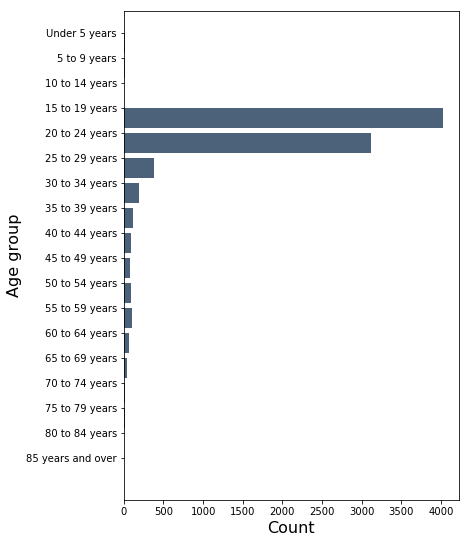

In [22]:
tograph.relabel('Columns', 'Age group') #Change the name of the first column from 'Column' to 'Age group'
tograph.relabel('Values', 'Count') #Change the name of the second column from 'Values' to 'Count
tograph.barh('Age group') #barh makes a bar graph, the h is for horizontal bar graphs

# Linear Algebra 

We have introduced basic concepts of Linear Algebra and how to use the numpy library.

In [37]:
oneD = np.array([1,2,3,4])            # 1D array construction
oneD

array([1, 2, 3, 4])

In [24]:
twoD = np.array([[4,-5], [-2,3]])   # 2D array contruction
twoD

array([[ 4, -5],
       [-2,  3]])

In [25]:
Identity = np.identity(3);              # 3x3 identity matrix
Identity

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [48]:
Random1 = np.random.rand(4,4) #Create a 5 x 4 matrix with random inputs [0,1)
Random2 = np.random.rand(4,4) #Create a 5 x 4 matrix with random inputs [0,1)
Random1

array([[ 0.78323237,  0.23199918,  0.78771058,  0.02981385],
       [ 0.6420725 ,  0.95462013,  0.62377632,  0.97610815],
       [ 0.12534792,  0.97774399,  0.04526643,  0.39553043],
       [ 0.36064359,  0.22411812,  0.03332979,  0.09539046]])

In [49]:
Random1+Random2 #Elementwise addition 
#or 
np.add(Random1, Random2)

array([[ 1.45075419,  0.38269568,  1.05649904,  0.4050673 ],
       [ 0.7135793 ,  1.26672272,  0.84646703,  1.69662335],
       [ 0.91631041,  0.98028352,  0.33835899,  1.26822815],
       [ 0.85280851,  1.12714963,  0.67833557,  0.85224303]])

In [50]:
Random1*Random2 #Elementwise multiplication

array([[ 0.5228247 ,  0.03496146,  0.21172752,  0.01118775],
       [ 0.04591255,  0.29793941,  0.13890919,  0.70330076],
       [ 0.0991455 ,  0.00248301,  0.01326725,  0.34517851],
       [ 0.17749612,  0.20238572,  0.02149791,  0.07219652]])

In [51]:
Random1/Random2 #Elementwise division

array([[  1.17334349e+00,   1.53951268e+00,   2.93059664e+00,
          7.94498966e-02],
       [  8.97918165e+00,   3.05867416e+00,   2.80108820e+00,
          1.35473638e+00],
       [  1.58475174e-01,   3.85009927e+02,   1.54444156e-01,
          4.53227307e-01],
       [  7.32769797e-01,   2.48184157e-01,   5.16736256e-02,
          1.26035730e-01]])

In [52]:
Random1*2  #Multiply each element of X by two

array([[ 1.56646475,  0.46399835,  1.57542116,  0.0596277 ],
       [ 1.28414501,  1.90924026,  1.24755265,  1.9522163 ],
       [ 0.25069584,  1.95548798,  0.09053287,  0.79106087],
       [ 0.72128718,  0.44823623,  0.06665957,  0.19078093]])

In [53]:
Random1*oneD #Multiply the ith column of X with the ith element of a

array([[ 0.78323237,  0.46399835,  2.36313173,  0.11925539],
       [ 0.6420725 ,  1.90924026,  1.87132897,  3.9044326 ],
       [ 0.12534792,  1.95548798,  0.1357993 ,  1.58212174],
       [ 0.36064359,  0.44823623,  0.09998936,  0.38156186]])

In [55]:
np.dot(Random1,oneD)  # Matrix multiplication 

array([ 3.72961785,  8.32707433,  3.79875693,  1.29043104])

In [56]:
np.linalg.solve(Random2, oneD) #Solves the system of linear equations Ax=b

array([-10.17785173, -18.12235939,  40.30221649,  -0.82039683])

An important concept of Linear Algebra is taking the inverse and transpose of a matrix. The inverse of a matrix A is the matrix B such that AB = Identity Matrix. The transpose of a matrix switches the positions of every element a_ij (ith row, jth column) to a_ji. Both these operations will be crucial for Linear Regression.

In [57]:
np.linalg.inv(twoD)  #Find the inverse of the Matrix

array([[ 1.5,  2.5],
       [ 1. ,  2. ]])

In [58]:
twoD.T  #Finds the tanspose of the matrix, remember the tranpose switches the position of the columns and rows
#or 
np.transpose(twoD)

array([[ 4, -2],
       [-5,  3]])